# Aspect Based Sentiment Analysis

In [1]:
# Load necessary library and module
import warnings
warnings.filterwarnings('ignore')

import sys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
import string
import unicodedata
import nltk
import sklearn
import scipy

nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#%matplotlib inline
# %load_ext google.colab.data_table

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load Dataset

In [2]:
# Read and show sample data
bank = pd.read_csv('review_mobile-banking_2023.csv', encoding='ISO-8859-1')


In [3]:
bank.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,08ea51f8-0cc4-4ddc-88b1-4debfd895c56,Kidyu,https://play-lh.googleusercontent.com/a-/AD_cM...,"""Spend Analysis"" feature is really spotty. Occ...",1,93,8.16.0,2023-04-11 15:50:51,Hello Jagoan! Sorry for the inconvinience you ...,2023-01-03 12:38:58,8.16.0,most_relevant,com.jago.digitalBanking
1,5b9748be-c910-4630-b94a-cf2f4a5d3b59,Sarah Annisa,https://play-lh.googleusercontent.com/a-/AD_cM...,Please fix the app. It's sooo lagging to move ...,1,13,8.17.0,2023-04-25 09:22:20,"Hello, Jagoan! We apologize if there are Jago ...",2023-04-25 18:20:50,8.17.0,most_relevant,com.jago.digitalBanking
2,de74d252-ab10-4e7f-a67b-6f7a1e401602,Rizki Lazuardi,https://play-lh.googleusercontent.com/a-/AD_cM...,"1. Cannot open notification, always says somet...",1,0,8.20.0,2023-07-04 08:59:32,NaN,NaN,8.20.0,most_relevant,com.jago.digitalBanking
3,655d4a7c-9318-4b2a-84c3-5f4d3515ac6e,Agus Sigit Wisnubroto,https://play-lh.googleusercontent.com/a-/AD_cM...,"Ngelag parah. The app lagging, lagging, and la...",1,0,8.19.0,2023-06-11 12:18:50,"Hai kak Agus Sigit Wisnubroto, maaf banget ya ...",2023-06-11 23:37:13,8.19.0,most_relevant,com.jago.digitalBanking
4,c573fefc-f335-4363-9bd1-894ae936c258,Rilo Rizki,https://play-lh.googleusercontent.com/a-/AD_cM...,"Phone on root with magisk, Jago is in deny lis...",1,1,8.19.0,2023-06-01 07:28:43,"Halo, Jagoan! Mohon maaf atas ketidaknyamanann...",2023-06-29 15:56:16,8.19.0,most_relevant,com.jago.digitalBanking


In [5]:
bank = bank[['content', 'score']]
bank = bank.dropna()
bank.head()

,content,score
0,"""Spend Analysis"" feature is really spotty. Occ...",1
1,Please fix the app. It's sooo lagging to move ...,1
2,"1. Cannot open notification, always says somet...",1
3,"Ngelag parah. The app lagging, lagging, and la...",1
4,"Phone on root with magisk, Jago is in deny lis...",1


In [6]:
bank.head()

,content,score
0,"""Spend Analysis"" feature is really spotty. Occ...",1
1,Please fix the app. It's sooo lagging to move ...,1
2,"1. Cannot open notification, always says somet...",1
3,"Ngelag parah. The app lagging, lagging, and la...",1
4,"Phone on root with magisk, Jago is in deny lis...",1


In [9]:
# score to polarity
def to_polarity(rating):
  rating = int(rating)
  if rating <= 2:
    return 'negative'
  elif rating == 3:
    return 'neutral'
  else: 
    return 'positive'


In [10]:

# score to sentiment
def to_sentiment(rating):
  rating = int(rating)
  if rating <= 2:
    return 0
  elif rating == 3:
    return 1
  else: 
    return 2


In [13]:

class_names = ['negative', 'neutral', 'positive']

bank['sentiment'] = bank.score.apply(to_sentiment)
bank['polarity'] = bank.score.apply(to_polarity)
# mlbb.head(3000)

In [23]:
bank.head()

,content,score,sentiment,polarity
0,"""Spend Analysis"" feature is really spotty. Occ...",1,0,negative
1,Please fix the app. It's sooo lagging to move ...,1,0,negative
2,"1. Cannot open notification, always says somet...",1,0,negative
3,"Ngelag parah. The app lagging, lagging, and la...",1,0,negative
4,"Phone on root with magisk, Jago is in deny lis...",1,0,negative


In [15]:
bank['polarity'].value_counts()

polarity
negative    3416
positive    3384
neutral     2518
Name: count, dtype: int64

In [16]:
#CHECKING FOR MISSING VALUES
bank.isnull().sum()


content      0
score        0
sentiment    0
polarity     0
dtype: int64

In [ ]:
bank.shape

In [21]:
bank.dropna(inplace=True)
bank.isnull().sum()


content      0
score        0
sentiment    0
polarity     0
dtype: int64

<Axes: ylabel='count'>

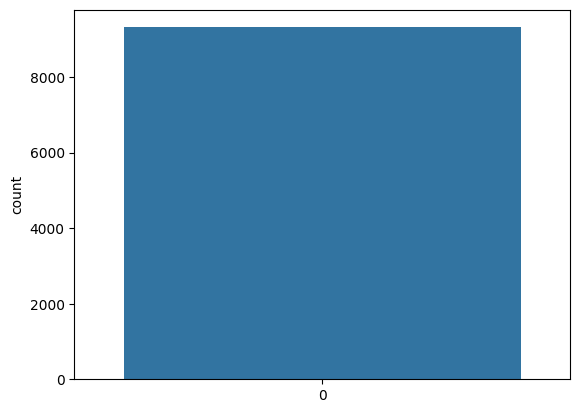

In [26]:
sns.countplot(bank.score)

In [27]:
bank.describe()

,score,sentiment
count,9318.000000,9318.000000
mean,3.003220,0.996566
std,1.409344,0.854305
min,1.000000,0.000000
25%,2.000000,0.000000
50%,3.000000,1.000000
75%,4.000000,2.000000
max,5.000000,2.000000


# TextBlob


In [16]:
# TextBlob
# https://www.analyticsvidhya.com/blog/2021/10/sentiment-analysis-with-textblob-and-vader/
# !pip install textblob


In [28]:
from textblob import TextBlob

In [29]:
def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None


In [30]:
def textblob_polarity(text):
    try:
        return TextBlob(text).polarity
    except:
        return None

In [31]:
def textblob_subject(text):
    try:
        return TextBlob(text).subjectivity
    except:
        return None

In [32]:

bank['textblob_sentiment'] = bank['content'].apply(sentiment_calc)
bank['textblob_polarity'] = bank['content'].apply(textblob_polarity)
bank['textblob_subject'] = bank['content'].apply(textblob_subject)

In [33]:
bank.head()

,content,score,sentiment,polarity,textblob_sentiment,textblob_polarity,textblob_subject
0,"""Spend Analysis"" feature is really spotty. Occ...",1,0,negative,"(0.04166666666666666, 0.4533333333333333)",0.041667,0.453333
1,Please fix the app. It's sooo lagging to move ...,1,0,negative,"(0.2033333333333333, 0.58)",0.203333,0.580000
2,"1. Cannot open notification, always says somet...",1,0,negative,"(-0.13333333333333333, 0.5944444444444444)",-0.133333,0.594444
3,"Ngelag parah. The app lagging, lagging, and la...",1,0,negative,"(0.1111111111111111, 0.8333333333333334)",0.111111,0.833333
4,"Phone on root with magisk, Jago is in deny lis...",1,0,negative,"(0.19999999999999998, 0.39999999999999997)",0.200000,0.400000


In [18]:
# sentence = mlbb.content[1100]
# print(mlbb.score[1100])
# print(sentence)
# res = TextBlob(sentence)
# print(res.sentiment.polarity)
# print(res.sentiment.subjectivity)

5
Great game overall, I do lag sometimes lime other people but there's times that I play without lagging.but sometimes there's just some toxic people that I hate, so I think if u report a toxic player they get banned for a week so they will understand not to be toxic.
-0.10500000000000001
0.485


# Vader

In [35]:
# !pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader=SentimentIntensityAnalyzer()

In [36]:

bank['vader_compound'] = [vader.polarity_scores(x)['compound'] for x in bank['content']]
bank['vader_neg'] = [vader.polarity_scores(x)['neg'] for x in bank['content']]
bank['vader_neu'] = [vader.polarity_scores(x)['neu'] for x in bank['content']]
bank['vader_pos'] = [vader.polarity_scores(x)['pos'] for x in bank['content']]

In [37]:
bank.head()

,content,score,sentiment,polarity,textblob_sentiment,textblob_polarity,textblob_subject,vader_compound,vader_neg,vader_neu,vader_pos
0,"""Spend Analysis"" feature is really spotty. Occ...",1,0,negative,"(0.04166666666666666, 0.4533333333333333)",0.041667,0.453333,0.7684,0.000,0.922,0.078
1,Please fix the app. It's sooo lagging to move ...,1,0,negative,"(0.2033333333333333, 0.58)",0.203333,0.580000,0.6486,0.034,0.848,0.118
2,"1. Cannot open notification, always says somet...",1,0,negative,"(-0.13333333333333333, 0.5944444444444444)",-0.133333,0.594444,-0.0516,0.097,0.781,0.122
3,"Ngelag parah. The app lagging, lagging, and la...",1,0,negative,"(0.1111111111111111, 0.8333333333333334)",0.111111,0.833333,-0.6486,0.219,0.781,0.000
4,"Phone on root with magisk, Jago is in deny lis...",1,0,negative,"(0.19999999999999998, 0.39999999999999997)",0.200000,0.400000,-0.4327,0.127,0.821,0.052


# Text Pre-Processing

In [38]:
# Apply text pre-processing to DataFrame
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

In [39]:
print(bank.content)

0       "Spend Analysis" feature is really spotty. Occ...
1       Please fix the app. It's sooo lagging to move ...
2       1. Cannot open notification, always says somet...
3       Ngelag parah. The app lagging, lagging, and la...
4       Phone on root with magisk, Jago is in deny lis...
                              ...                        
9313                             Cool apps! Easy to use..
9314               App yang nggak ribet dan mudah diakses
9315    Awesome... Quick, Responsive and User friendly...
9316                Wow, gampang pakenya. Keep update ya.
9317                        Cakep... Sukses terus danamon
Name: content, Length: 9318, dtype: object


In [40]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [41]:
def stemmin(text):
    # try:
    words = word_tokenize(text)
    stemn = [porter_stemmer.stem(w) for w in words]
    # for w in words:
    #     stems = porter_stemmer.stem(w)
    stemm = ' '.join(stemn)
    # except:
        # return text
    return stemm

In [42]:
text = "just recently, it can't even start a game. It always crashed on hero selection screen. Than after restart, it crashes again at loading screen, always at around 20%. I have tried restarting, reloading, reinstalling the game, turning off Samsung game launcher, etc. Nothing worked. So the problem is not on the phone. It has worked wonderfully before for three years."
stemmin(text)

"just recent , it ca n't even start a game . it alway crash on hero select screen . than after restart , it crash again at load screen , alway at around 20 % . i have tri restart , reload , reinstal the game , turn off samsung game launcher , etc . noth work . so the problem is not on the phone . it ha work wonder befor for three year ."

In [43]:
bank.head()

,content,score,sentiment,polarity,textblob_sentiment,textblob_polarity,textblob_subject,vader_compound,vader_neg,vader_neu,vader_pos
0,"""Spend Analysis"" feature is really spotty. Occ...",1,0,negative,"(0.04166666666666666, 0.4533333333333333)",0.041667,0.453333,0.7684,0.000,0.922,0.078
1,Please fix the app. It's sooo lagging to move ...,1,0,negative,"(0.2033333333333333, 0.58)",0.203333,0.580000,0.6486,0.034,0.848,0.118
2,"1. Cannot open notification, always says somet...",1,0,negative,"(-0.13333333333333333, 0.5944444444444444)",-0.133333,0.594444,-0.0516,0.097,0.781,0.122
3,"Ngelag parah. The app lagging, lagging, and la...",1,0,negative,"(0.1111111111111111, 0.8333333333333334)",0.111111,0.833333,-0.6486,0.219,0.781,0.000
4,"Phone on root with magisk, Jago is in deny lis...",1,0,negative,"(0.19999999999999998, 0.39999999999999997)",0.200000,0.400000,-0.4327,0.127,0.821,0.052


In [72]:
# from tqdm import tqdm
# from tqdm._tqdm_notebook import tqdm_notebook
# tqdm.pandas()
# tqdm_notebook.pandas()

from tqdm import tqdm, tqdm_pandas
tqdm_pandas(tqdm())

In [73]:
def text_preprocessing(text):
  text = text.lower()                                   # Lowercase all sentences
  text = text.strip()                                   # Remove whitespace
  text = re.sub('[-+]?[0-9]+', ' ', text)               # Remove numbers 
  text = re.sub(r'https?://\S+|www\.\S+', ' ', text)    # Remove URLs
  text = re.sub(r"pic.twitter.com\S+", ' ', text)       # Remove custom URLs for twitter
  text = re.sub(r'\@([\w]+)',' ', text)                 # Remove Mention @
  text = re.sub(r'\#([\w]+)',' ', text)                 # Remove #TAGAR
  text = re.sub('\S*@\S*\s?', ' ', text)                # Remove email
  text = re.sub(r'[^\w\s]', ' ', text)                  # Remove punctuation
  text = re.sub(r'\b\w{1,3}\b','',text)                 #Remove n-chars,Remove less than 3 chars, minimum 4 character allowed "\b[a-zA-Z0-9]{3}\b"
  text = re.sub(r'[!$%^&*@#()_+|~=`{}\[\]%\-:";\'<>?,.\/]', ' ', text)  # Tahap-5: simbol
  text = re.sub(r'[0-9]+','', text)                     # Tahap-6: angka
  text = re.sub(r'([a-zA-Z])\1\1','\\1', text)          # Tahap-7: koreksi duplikasi tiga karakter beruntun atau lebih (contoh. yukkk)
  text = re.sub(' +',' ', text)                         #remove multiple whitespace
  text = re.sub(r'^[ ]|[ ]$','', text)                  # Tahap-9: spasi di awal dan akhir kalimat

  # text = re.sub('\b[a-zA-Z0-9]{3}\b','',text)
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore') # Remove non-ascii character
  word_tokens = word_tokenize(text) # Word tokenize
  
  stem_words = [porter_stemmer.stem(w) for w in word_tokens]
  
  # Define Indonesian stopwords removal
  stop_words = stopwords.words('english')  # NLTK Indonesian stopwords
  clean_words = [word for word in stem_words if word not in stop_words] # stopwords removal
  clean_words = ' '.join(clean_words)

  words = set(nltk.corpus.words.words())
  word_cleaner = word_tokenize(clean_words)
  cleaner_words = [w for w in word_cleaner if w.lower() in words or not w.isalpha()] #remove non english

  cleaner = ' '.join(cleaner_words)


#   cleaner = " ".join(w for w in nltk.wordpunct_tokenize(clean_words) \
        #   if w.lower() in words or not w.isalpha())
  return cleaner

In [74]:
pre=text_preprocessing(bank['content'][42])

In [75]:
print(pre)

fail lock pocket tri


In [76]:
bank['clean_content'] = bank['content'].progress_apply(lambda x: text_preprocessing(x))

In [77]:

# ffm.to_csv( "ffm_clean_content_after_preprocessing_21062022.csv", index=False, encoding='utf-8-sig')
bank.to_csv( "bank_after_cleancontent_22082023.csv", index=False, encoding='utf-8-sig')


In [95]:

# mlbb.dropna(inplace=True)

In [78]:
bank.isnull().sum()#.values()

content               0
score                 0
sentiment             0
polarity              0
textblob_sentiment    0
textblob_polarity     0
textblob_subject      0
vader_compound        0
vader_neg             0
vader_neu             0
vader_pos             0
clean_content         0
dtype: int64

In [ ]:
# mlbb.to_csv( "dataset/mlbb_clean_content_after_preprocessing_24062022_textblobvader.csv", index=False, encoding='utf-8-sig')
# ffm.to_csv( "dataset/ffm_clean_content_after_preprocessing_24062022_textblobvader.csv", index=False, encoding='utf-8-sig')
# hdi.to_csv( "dataset/hdi_clean_content_after_preprocessing_24062022_textblobvader.csv", index=False, encoding='utf-8-sig')

In [79]:
bank['clean_vader_compound'] = [vader.polarity_scores(x)['compound'] for x in bank['clean_content']]
bank['clean_vader_neg'] = [vader.polarity_scores(x)['neg'] for x in bank['clean_content']]
bank['clean_vader_neu'] = [vader.polarity_scores(x)['neu'] for x in bank['clean_content']]
bank['clean_vader_pos'] = [vader.polarity_scores(x)['pos'] for x in bank['clean_content']]

In [80]:
bank['clean_textblob_sentiment'] = bank['clean_content'].apply(sentiment_calc)
bank['clean_textblob_polarity'] = bank['clean_content'].apply(textblob_polarity)
bank['clean_textblob_subject'] = bank['clean_content'].apply(textblob_subject)

Exception ignored in: <function tqdm.__del__ at 0x000001D8E8F687C0>
Traceback (most recent call last):
  File "c:\Python311\Lib\site-packages\tqdm\std.py", line 1149, in __del__
    self.close()
  File "c:\Python311\Lib\site-packages\tqdm\notebook.py", line 278, in close
    self.disp(bar_style='danger', check_delay=False)
    ^^^^^^^^^
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
Exception ignored in: <function tqdm.__del__ at 0x000001D8E8F687C0>
Traceback (most recent call last):
  File "c:\Python311\Lib\site-packages\tqdm\std.py", line 1149, in __del__
    self.close()
  File "c:\Python311\Lib\site-packages\tqdm\notebook.py", line 278, in close
    self.disp(bar_style='danger', check_delay=False)
    ^^^^^^^^^
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
Exception ignored in: <function tqdm.__del__ at 0x000001D8E8F687C0>
Traceback (most recent call last):
  File "c:\Python311\Lib\site-packages\tqdm\std.py", line 1149, in __del__
    self.close()
 

In [81]:
bank.to_csv( "bank_textblobvader_clean_content_24082023.csv", index=False, encoding='utf-8-sig')
# ffm.to_csv( "dataset/ffm_textblobvader_clean_content_24062022.csv", index=False, encoding='utf-8-sig')
# hdi.to_csv( "dataset/hdi_textblobvader_clean_content_24062022.csv", index=False, encoding='utf-8-sig')